<a href="https://colab.research.google.com/github/alfonsocude/MACHINE-LEARNING-1/blob/main/18-%5BTALLER%5D_Metricas_de_Evaluacion_de_modelos_de_ML.ipynb#scrollTo=KUyBpQLcOLWH" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

# **Integrantes**

- Juan Esteban Almeida Villamizar
- Nestor Andres Tabares David
- Andres Felipe Ortiz Gomez
- Sofia Isabella Endara Chitiva
- Juan David Lasso Arias
- Juan Diego Saldarriaga

In [21]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/alfonsocude/MACHINE-LEARNING-1/main/init.py
import init; init.init(force_download=False);

## **Importación de Librerias**

In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
!pip install scikit-learn==0.22

  Using cached scikit-learn-0.22.tar.gz (6.9 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
  Running setup.py clean for scikit-learn
Failed to build scikit-learn
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (scikit-learn)


## Ejercicio 1: Contextualización del problema


Usaremos el dataset breast_cancer para el problema de clasificación. En el repositorio de sklearn se encuentra más información en el siguiente [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [24]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
Y = data.target

In [25]:
print ("Número de muestras", X.shape[0])
print ("Número de variables", X.shape[1])
print ("Número de clases", len(np.unique(Y)))

Número de muestras 569
Número de variables 30
Número de clases 2


- 569 muestras: lo que representa datos clínicos de 569 pacientes diferentes. Este tamaño es suficiente para entrenar modelos robustos en problemas de clasificación binaria.

- 30 variables independientes: cada una describe características médicas específicas del tumor, como tamaño, textura, perímetro y otras mediciones relevantes. La cantidad de variables (30) proporciona suficiente detalle para que un modelo pueda identificar patrones relevantes en los datos.

- 2 clases (benigno y maligno): indica que se trata de un problema de clasificación binaria, lo que simplifica la evaluación y selección de modelos predictivos adecuados.

Grafique un histograma de la variables de salida:

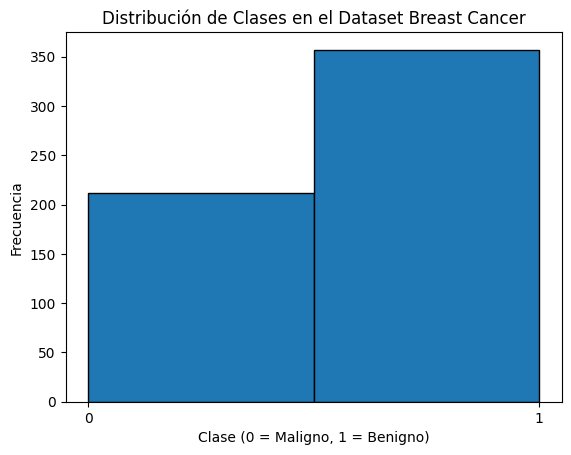

In [26]:
#Ejercicio de código
import matplotlib.pyplot as plt

# Gráfica del histograma para la variable objetivo (clases del dataset)
plt.hist(Y, bins=2, edgecolor='black')

# Añadiendo etiquetas y título
plt.title('Distribución de Clases en el Dataset Breast Cancer')
plt.xlabel('Clase (0 = Maligno, 1 = Benigno)')
plt.ylabel('Frecuencia')

# Cambiando las etiquetas del eje X para que sean más claras
plt.xticks([0, 1])

# Mostrando la gráfica
plt.show()

### **Análisis del Histograma**

El histograma muestra la distribución de las clases del dataset de cáncer de mama:

- Clase 0 (Maligno): Aproximadamente 210 muestras.

- Clase 1 (Benigno): Aproximadamente 360 muestras.

Se observa que la clase **Benigno** tiene un número mayor de muestras en comparación con la clase **Maligno**, indicando que el dataset no está completamente balanceado, aunque la diferencia no es extrema. Esto implica que hay más registros de tumores benignos que malignos, lo cual es una característica habitual en este tipo de problemas médicos.

Al ser relativamente balanceado, el dataset permite entrenar modelos sin gran preocupación por sesgos importantes debido a desequilibrio significativo entre las clases. Sin embargo, es importante evaluar las métricas cuidadosamente, especialmente aquellas que consideren la sensibilidad y especificidad para asegurar la adecuada identificación de los casos malignos, que son clínicamente más críticos

## Ejercicio 2: Entrenamiento y evaluación de modelos

En este ejercicio se usarán los modelos de regresión logística, Naïve Bayes y Discriminante Cuadrático para resolver el problema de preddicón de cancer.

In [27]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

Vamos a usar una partición similar a las usados en talleres anteriores:

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

Recuerde estandarizar variables...

In [29]:
from sklearn.preprocessing import StandardScaler
# Instanciar el estandarizador
scaler = StandardScaler()

# Ajustar el escalador solo con datos de entrenamiento y transformar
X_train_n = scaler.fit_transform(X_train)

# Transformar datos de prueba usando el mismo escalador ajustado al entrenamiento
X_test_n = scaler.transform(X_test)

Instancie un objeto de cada uno de los modelos a comparar, use los parámetros por defecto para cada modelo y entrene el modelo con el conjunto X_train_n, y_train.

In [30]:
# Instanciar los modelos con parámetros por defecto
clf1 = QuadraticDiscriminantAnalysis()
clf2 = GaussianNB()
clf3 = LogisticRegression()

# Entrenar cada modelo usando los datos estandarizados de entrenamiento
clf1.fit(X_train_n, y_train)
clf2.fit(X_train_n, y_train)
clf3.fit(X_train_n, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


LogisticRegression()

A continuación cargaremos las métricas para evaluar los modelos:

In [31]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

Ejecute la siguiente para ver los resultados de los modelos

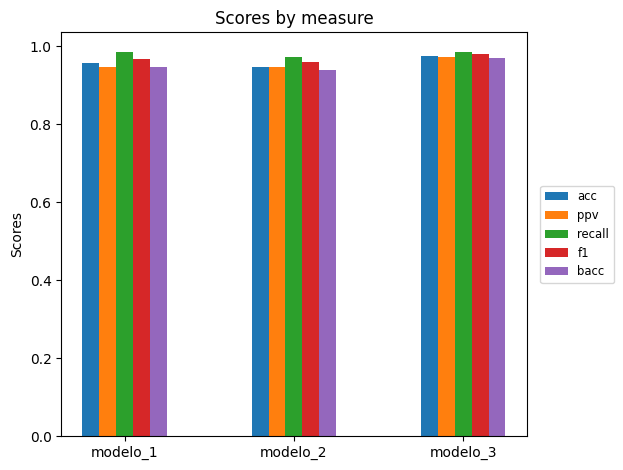

In [32]:
labels = ['modelo_1', 'modelo_2', 'modelo_3']
measures = ['acc','ppv','recall','f1','bacc']
Performance = []
Performance.append([accuracy_score(y_test,clf1.predict(X_test_n)), accuracy_score(y_test,clf2.predict(X_test_n)), accuracy_score(y_test,clf3.predict(X_test_n))])
Performance.append([precision_score(y_test,clf1.predict(X_test_n)), precision_score(y_test,clf2.predict(X_test_n)), precision_score(y_test,clf3.predict(X_test_n))])
Performance.append([recall_score(y_test,clf1.predict(X_test_n)), recall_score(y_test,clf2.predict(X_test_n)), recall_score(y_test,clf3.predict(X_test_n))])
Performance.append([f1_score(y_test,clf1.predict(X_test_n)), f1_score(y_test,clf2.predict(X_test_n)), f1_score(y_test,clf3.predict(X_test_n))])
Performance.append([balanced_accuracy_score(y_test,clf1.predict(X_test_n)), balanced_accuracy_score(y_test,clf2.predict(X_test_n)), balanced_accuracy_score(y_test,clf3.predict(X_test_n))])

x = np.arange(len(labels))*2  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width+0.3 -0.7, Performance[i],width, label=measures[i])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

In [33]:
#@title Pregunta Abierta
#@markdown  ¿El desbalance observado en el conjunto de datos afectó el desempeño de los modelos?
respuesta_1 = "No significativamente. El leve desbalance observado (benigno ≈360 vs maligno ≈210) no generó problemas mayores en las métricas de desempeño, pues todas muestran valores altos (cercanos a 1). Esto sugiere que los modelos lograron aprender eficazmente de ambas clases. Sin embargo, siempre es importante verificar métricas sensibles al desbalance como recall o precisión, especialmente si se prioriza la detección de una clase específica." #@param {type:"string"}

In [34]:
#@title Pregunta Abierta
#@markdown  Escoja una medida de desempeño global para evaluar el modelo. ¿Qué medida seleccionó? Justifique su respuesta.
respuesta_2 = "Se escoge la medida F1-score como métrica global, ya que combina precisión y recall, siendo útil especialmente en problemas donde el balance entre falsos positivos y falsos negativos es crucial. El F1-score es muy adecuado en contextos médicos, como este, donde no detectar un cáncer maligno (falsos negativos) tiene consecuencias graves." #@param {type:"string"}

Grafique la matriz de confusión normalizada para el mejor modelo de acuerdo con la medida de desempeño seleccionada  en la respuesta a la pregunta anterior. Revise la documentación del método en [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

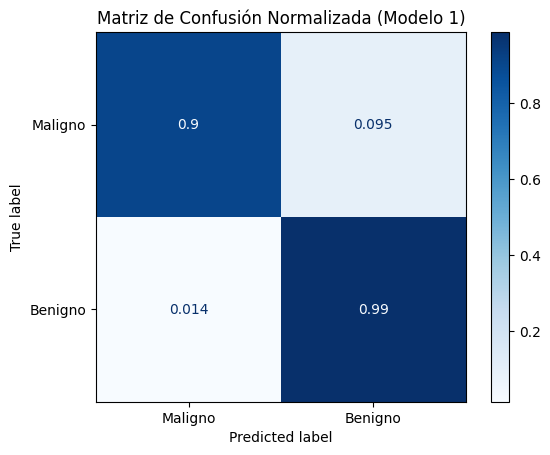

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicciones del modelo 1 (QuadraticDiscriminantAnalysis)
y_pred = clf1.predict(X_test_n)

# Matriz de confusión normalizada
cm = confusion_matrix(y_test, y_pred, normalize='true')

# Visualización
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Maligno', 'Benigno'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión Normalizada (Modelo 1)")
plt.show()



Grafique en una misma figura las curvas ROC de los tres modelos e incluya en las etiquetas de la figura, el Area Bajo la curva obtenida para cada modelo. Revise la documentación del método en [link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html)

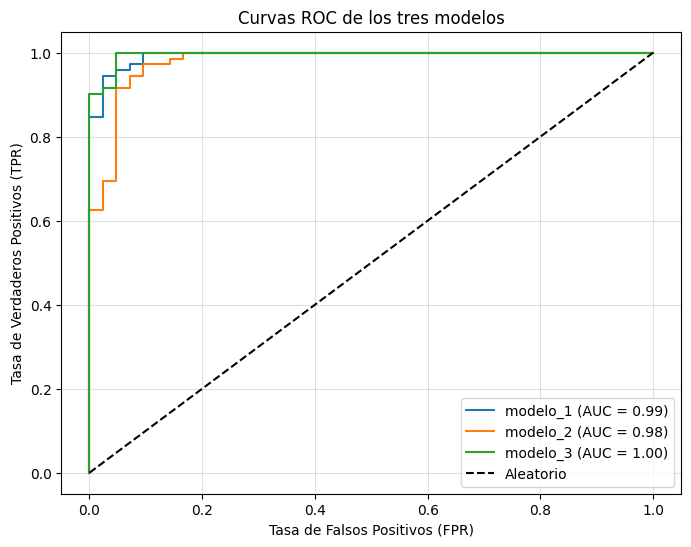

In [36]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

models = [clf1, clf2, clf3]

fpr = []
tpr = []
roc_auc = []

plt.figure(figsize=(8, 6))

for i in range(len(labels)):
    # Probabilidad para la clase positiva
    y_score = models[i].predict_proba(X_test_n)[:, 1]

    # Calcular fpr y tpr para el modelo actual
    fpr_i, tpr_i, _ = roc_curve(y_test, y_score)
    fpr.append(fpr_i)
    tpr.append(tpr_i)

    # Calcular el AUC para cada modelo
    roc_auc_i = auc(fpr_i, tpr_i)
    roc_auc.append(roc_auc_i)

    # Graficar curva ROC
    plt.plot(fpr[i], tpr[i], label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

# Línea diagonal de referencia
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')

# Detalles adicionales del gráfico
plt.title('Curvas ROC de los tres modelos')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend()
plt.grid(alpha=0.4)
plt.show()


**Análisis de las curvas ROC obtenidas**

Al observar las curvas ROC, notamos que los tres modelos alcanzan valores extremadamente altos en el área bajo la curva (AUC): modelo 1 con 0.99, modelo 2 con 0.98, y especialmente el modelo 3 con un sospechoso valor de 1.0. Este último resultado (AUC=1.0) generalmente indica problemas metodológicos, como fuga de información (data leakage) o sobreajuste extremo, ya que un desempeño perfecto en escenarios reales es altamente improbable.

Por ello, se recomienda verificar cuidadosamente que la estandarización haya sido realizada correctamente, asegurándose de ajustar (fit) el escalador solo con el conjunto de entrenamiento y luego transformar el conjunto de prueba. También es aconsejable validar la robustez del desempeño mediante validación cruzada, preferiblemente con métodos como StratifiedKFold, para asegurar la generalización real del modelo.

Finalmente, aunque los resultados parecen ideales, es fundamental complementar esta evaluación con métricas adicionales como precisión, recall y F1-score, especialmente en contextos médicos donde la detección correcta es crucial. Estas acciones garantizarán que el desempeño reportado sea realista y confiable para aplicaciones prácticas.